# iris flower classification

# author-malika kaur

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [7]:

from sklearn.datasets import load_iris
iris_data = load_iris()


In [8]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
df=pd.DataFrame(iris_data.data)
df.columns=iris_data.feature_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df['species']=iris_data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df['species'].unique()

array([0, 1, 2])

In [13]:
print("species name:",iris_data['target_names'])

species name: ['setosa' 'versicolor' 'virginica']


In [14]:
df.shape

(150, 5)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [16]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [17]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [18]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

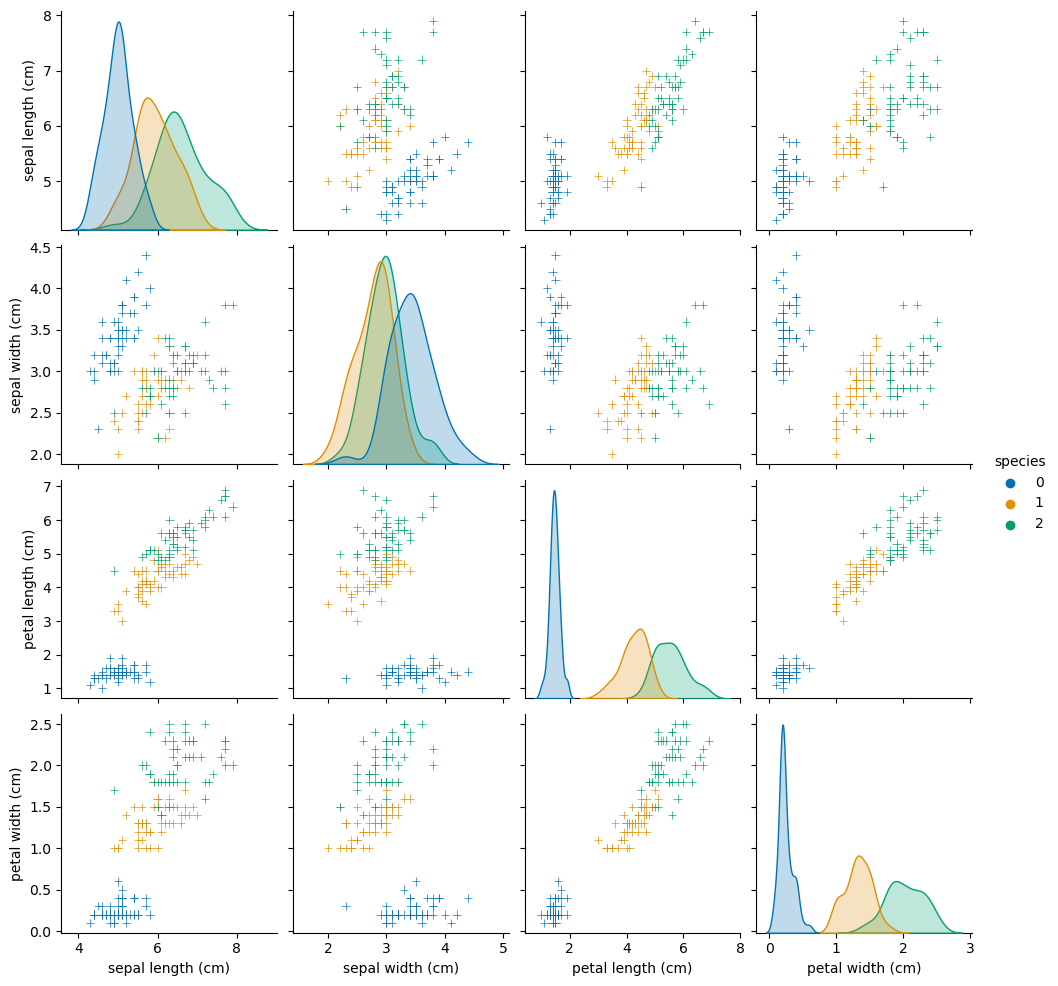

In [19]:
sns.pairplot(df,hue='species',markers='+',palette='colorblind')
plt.show()

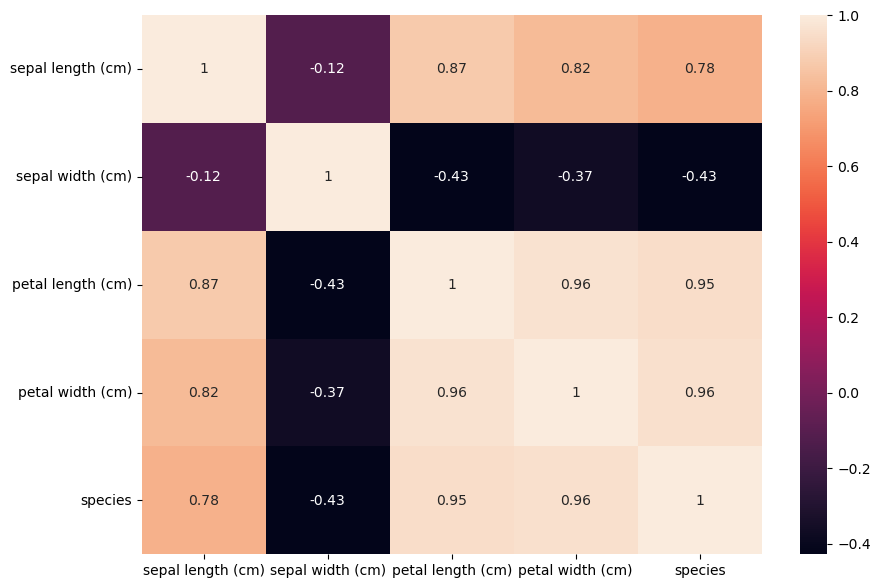

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.show()


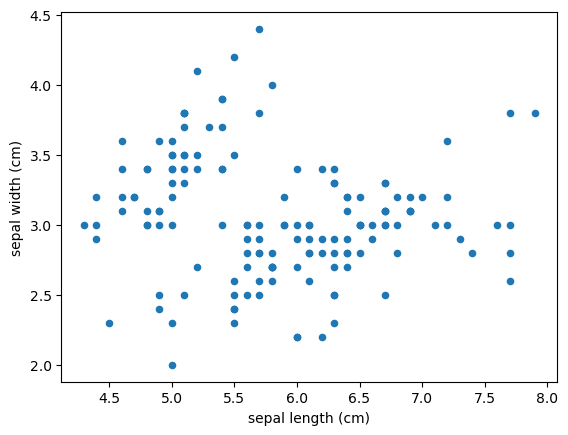

In [23]:
df.plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)')
plt.show()

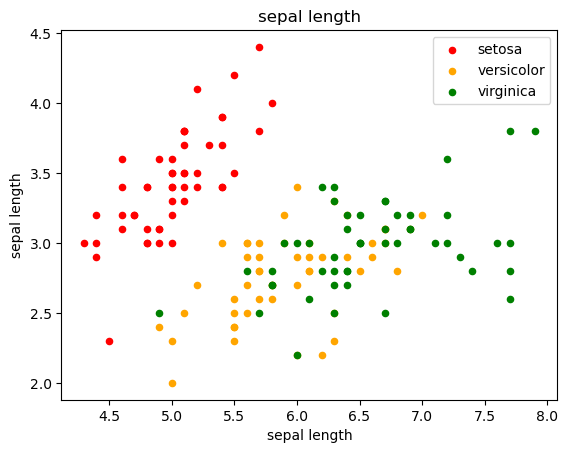

In [31]:
fig=df[df.species==0].plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)',color='red',label='setosa')
df[df.species==1].plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)', color='orange',label='versicolor',ax=fig)
df[df.species==2].plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)', color='green',label='virginica',ax=fig)
fig.set_xlabel('sepal length')
fig.set_ylabel('sepal length') 
fig.set_title('sepal length')
plt.show()

                       

<Axes: xlabel='species', ylabel='sepal length (cm)'>

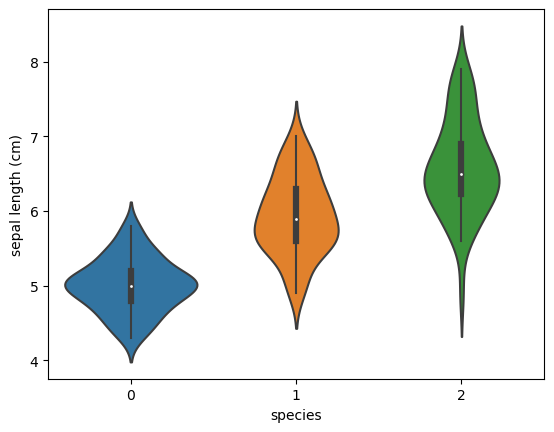

In [32]:
sns.violinplot(x="species",y='sepal length (cm)',data=df)

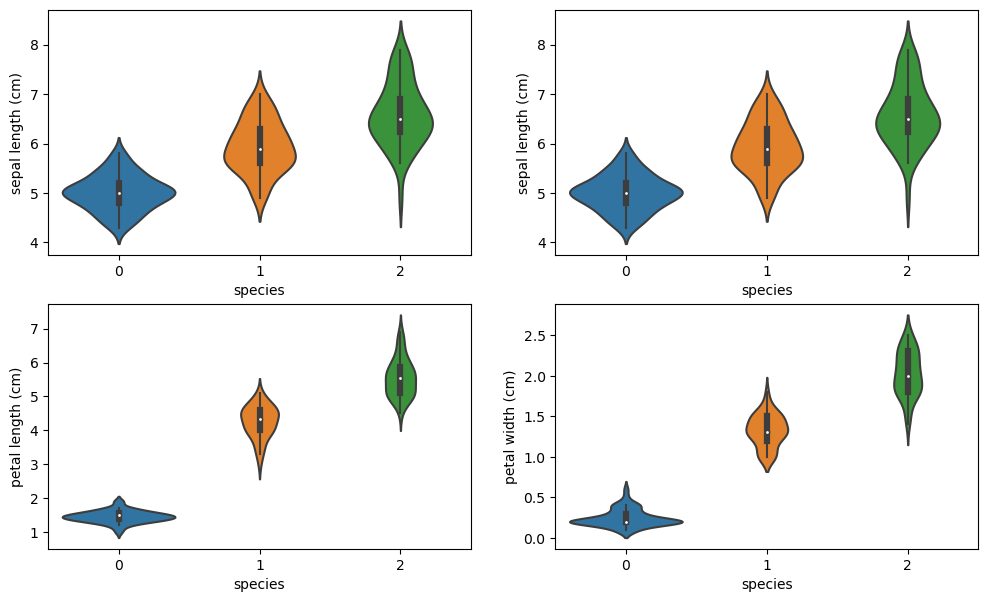

In [33]:
plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
sns.violinplot(x="species",y='sepal length (cm)',data=df)
plt.subplot(2,2,2)
sns.violinplot(x="species",y='sepal length (cm)',data=df)
plt.subplot(2,2,3)
sns.violinplot(x="species",y='petal length (cm)',data=df)
plt.subplot(2,2,4)
sns.violinplot(x="species",y='petal width (cm)',data=df)
plt.show()

In [36]:
X=df.drop('species',axis=1)
y=df['species']

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (120, 4)
X_test: (30, 4)
y_train: (120,)
y_test: (30,)


In [45]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred=dtree.predict(X_test)
dtree_acc=accuracy_score(dtree_pred,y_test)
print("test accuracy: {:.2f}%".format(dtree_acc*100))


test accuracy: 100.00%


In [46]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [47]:
print(confusion_matrix(y_test,dtree_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


[Text(0.3076923076923077, 0.9285714285714286, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolor'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.38461538461538464, 0.7857142857142857, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = versicolor'),
 Text(0.15384615384615385, 0.6428571428571429, 'petal width (cm) <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6153846153846154, 0.6428571428571429, 'petal width (cm) <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = virginica'),
 Text(0.38461538461538464, 0.5, 'petal length (cm) <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = 

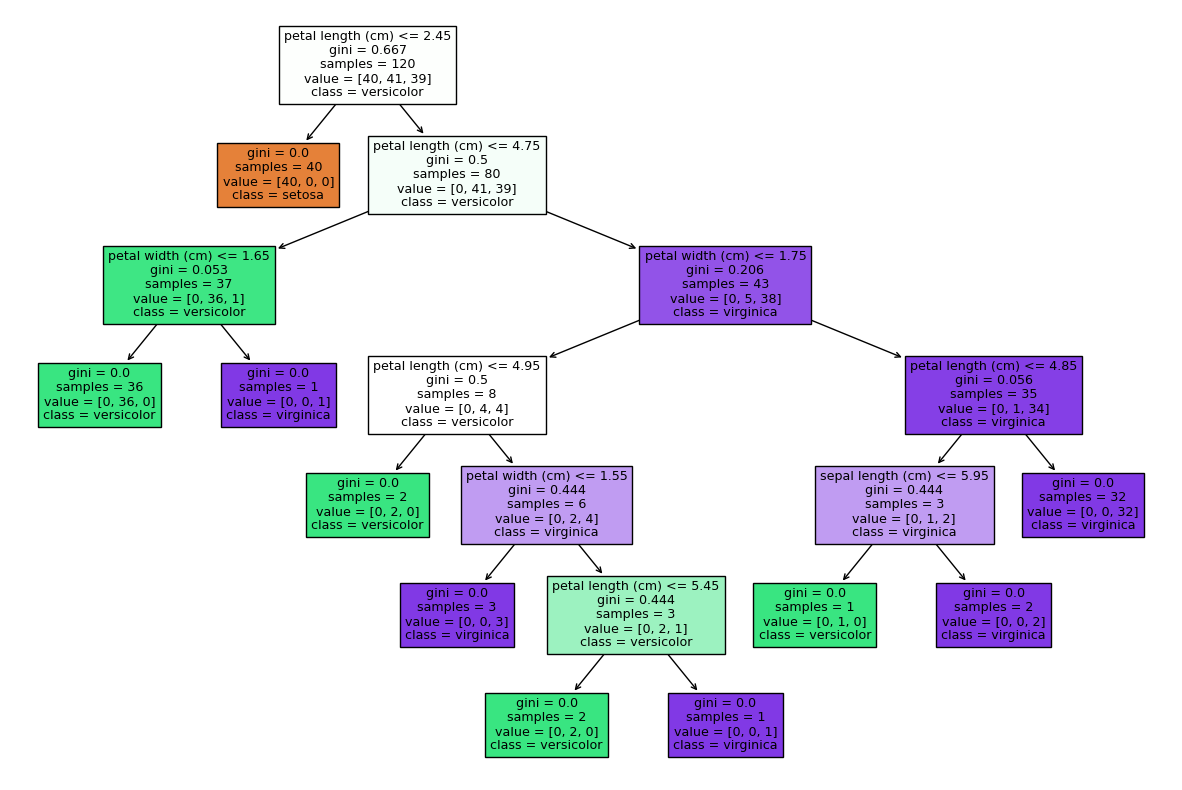

In [50]:
plt.figure(figsize=(15,10))
plot_tree(dtree,feature_names=iris_data.feature_names,class_names=iris_data['target_names'],filled=True)

In [54]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
knn_pred=knn_model.predict(X_test)
knn_acc=accuracy_score(knn_pred,y_test)
print("test accuracy:{:.2f}%".format(knn_acc*100))

test accuracy:100.00%


In [55]:
print(confusion_matrix(y_test,knn_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [56]:
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [57]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [60]:
data={'sepal length (cm)':5.0,'sepal width (cm)':3.4,'petal length (cm)':1.4,'petal width (cm)':0.2}
index=[0]
new_df=pd.DataFrame(data,index)
new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.0,3.4,1.4,0.2


In [61]:
value_pred=dtree.predict(new_df)
value_pred

array([0])